In [108]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/bharat/Downloads


In [109]:
import pandas as pd
import numpy as np

In [110]:
df = pd.read_csv('student-mat-pass-or-fail.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


In [111]:
df['passed'] = df['pass']

In [112]:
df = df.drop('pass', axis = 1)

In [113]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


In [114]:
print(str(df[df.passed == 1].shape[0]) + " students have passed")
print(str(df[df.passed == 0].shape[0]) + " students have not passed")

265 students have passed
130 students have not passed


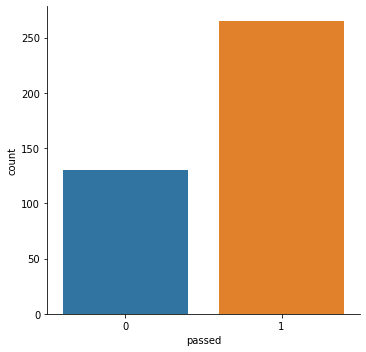

In [115]:
import seaborn as sns
sns.factorplot('passed',data=df,kind='count')

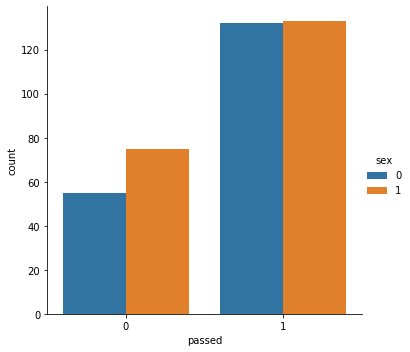

In [116]:
sns.factorplot('passed',data=df,hue = 'sex',kind='count')

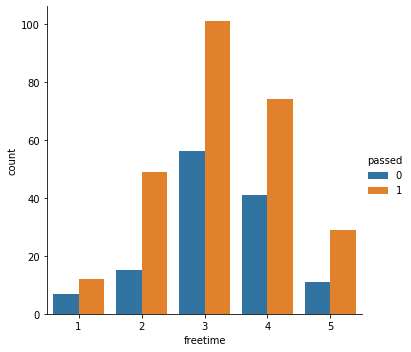

In [45]:
sns.factorplot('freetime',data=df,hue = 'passed',kind='count')

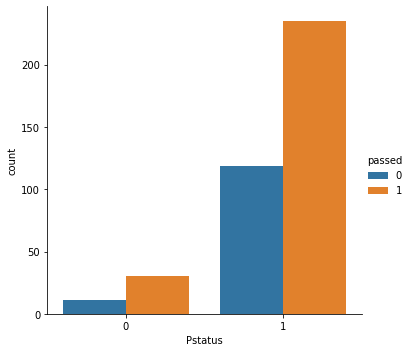

In [46]:
sns.factorplot('Pstatus',data=df,hue = 'passed',kind='count')

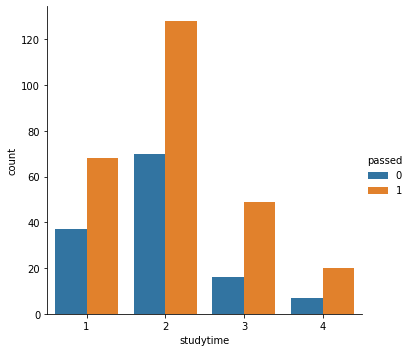

In [107]:
sns.factorplot('studytime',data=df,hue = 'passed',kind='count')

In [117]:
class Logistic_Regression:
    def __init__(self, lr, iters):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
    
    def fit_and_train(self, x, y):
        self.weights = np.zeros(x.shape[1])
        self.bias = 0
        for i in range(self.iters):
            mod = np.dot(x, self.weights) + self.bias
            y_pred = self.sigmoid(mod)
            dw = 1/x.shape[1] * np.dot(x.T, y_pred - y)
            db = 1/x.shape[1] * np.sum(y_pred - y)
            
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
    
    def predict(self, x):
        mod = np.dot(x, self.weights) + self.bias
        y_pred = self.sigmoid(mod) 
        predictions = []
        for i in range(len(y_pred)):
            if y_pred[i] > 0.5:
                predictions.append(1)
            else:
                predictions.append(0)
        return np.asarray(predictions)
        
    def accuracy(self, predictions, y):
        return np.sum(predictions == y)/len(y)
            
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    
            
      
        

In [118]:
logistic = Logistic_Regression(0.001, 100)

In [119]:
logistic.fit_and_train(x_train, y_train)



In [120]:
pred = logistic.predict(x_test)

In [121]:
pred1 = logistic.predict(x_train)
logistic.accuracy(pred1, y_train)

0.939873417721519

In [53]:
y_pred = np.array([0, 1, 1, 1, 1])
y = np.array([1, 1, 1, 0, 1])

np.sum(y == y_pred)

3

In [55]:
df.shape

(395, 30)

In [66]:
x = df.iloc[:, 0:29].to_numpy()
x

array([[ 1,  1, 18, ...,  5,  6,  6],
       [ 1,  1, 17, ...,  5,  5,  6],
       [ 1,  1, 15, ...,  7,  8, 10],
       ...,
       [ 0,  0, 21, ..., 10,  8,  7],
       [ 0,  0, 18, ..., 11, 12, 10],
       [ 0,  0, 19, ...,  8,  9,  9]])

In [69]:
y = df.iloc[:, 29].to_numpy()
y

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [70]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
x_train

array([[ 1,  0, 17, ..., 16, 12, 13],
       [ 1,  1, 15, ..., 10, 13, 13],
       [ 1,  1, 16, ...,  6,  7,  0],
       ...,
       [ 1,  0, 18, ..., 14, 13, 14],
       [ 1,  0, 17, ..., 12, 12, 13],
       [ 1,  1, 17, ..., 17, 17, 18]])

In [95]:
y_train.shape

(316,)

NameError: name 'Logistic_Regression' is not defined